In [48]:
from obspy.core import Stream, read
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
from matplotlib.colors import Normalize
import pandas as pd
import os 
import os.path

In [118]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'M6_catalog_2004-2024.csv', dtype = str)

weird_events_only = False
if weird_events_only:
    earthquakes = earthquakes.iloc[[4,15]]

small_test = False
if small_test:
    earthquakes = earthquakes[5:7]
    
one_at_a_time = True
if one_at_a_time:
    earthquakes = earthquakes[:1]

origin_times = earthquakes.time.values
mags = earthquakes.mag.values

bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values

eqs_test = earthquakes[4:5]
ots_test = origin_times[4:5]
mags_test = mags[4:5]
rows_for_extra_times = [8,9,14,16]

snr_array = np.load('/Users/sydneydybing/StrainProject/2024/NA_evt-sta_dist_array_less500km_withdata_withrmssnrs.npy')

# Array order:

# 0. Earthquake identifier
# 1. Earthquake origin time
# 2. Earthquake latitude
# 3. Earthquake longitude
# 4. Earthquake magnitude
# 5. Station name
# 6. Station latitude
# 7. Station longitude
# 8. Hypocentral distance (km)
# 9. RMS strain SNR

0.693740119902
1164.86406239
61


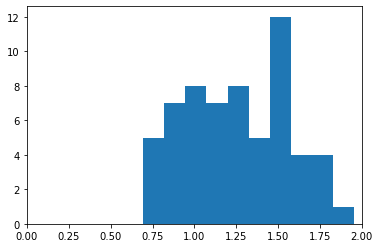

In [130]:
snrs = snr_array[:,9]
snrs_nonan = []

for snr in snrs:
#     print(snr)
    if snr != 'nan':
        snrs_nonan.append(float(snr))
        
print(min(snrs_nonan))
print(max(snrs_nonan))

m = np.where(np.array(snrs_nonan) <= 2)[0]
print(len(m))

plt.hist(np.array(snrs_nonan)[m], bins = 10)
plt.xlim(0, 2);

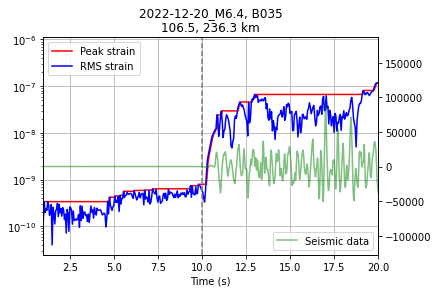

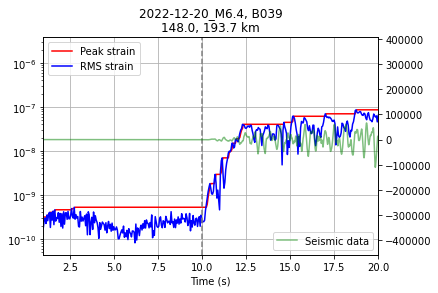

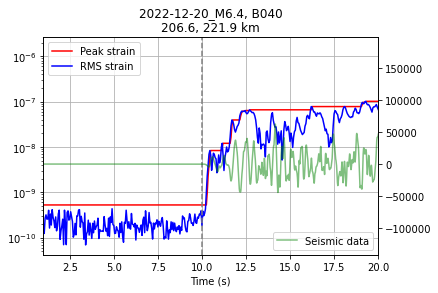

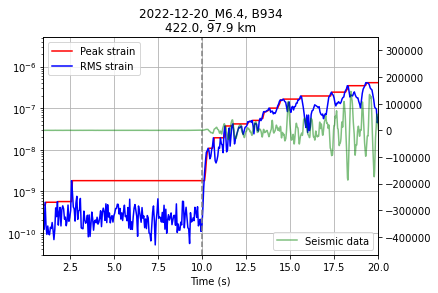

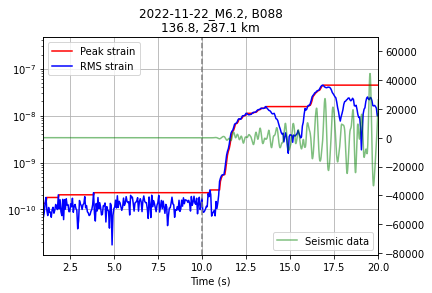

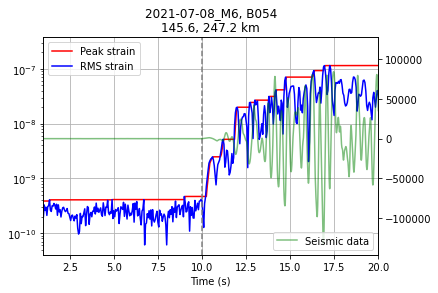

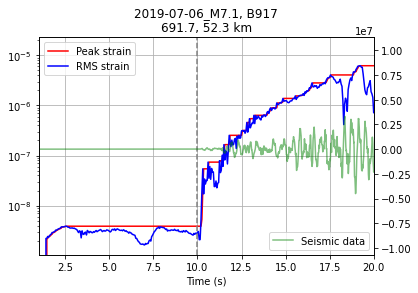

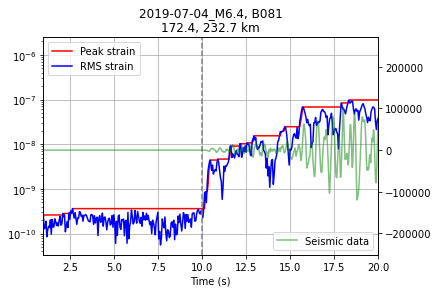

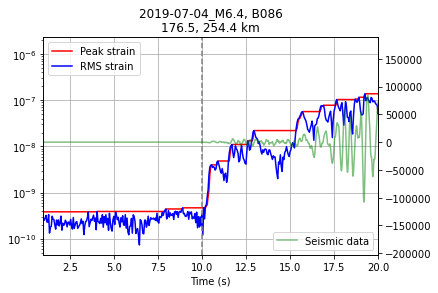

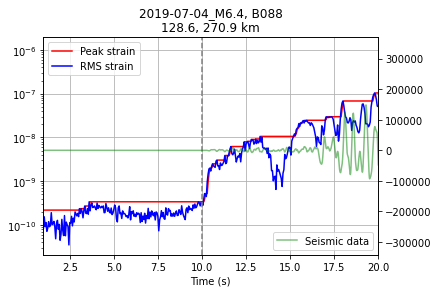

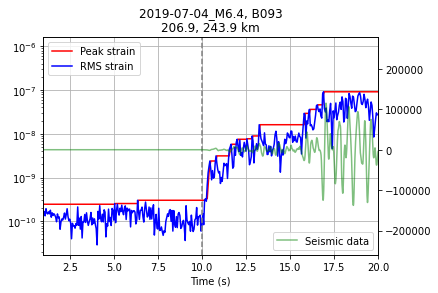

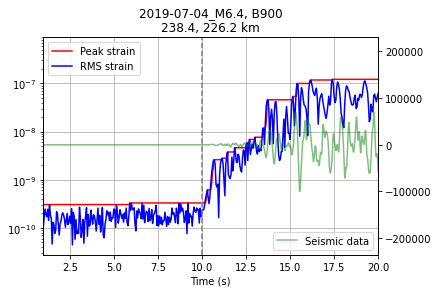

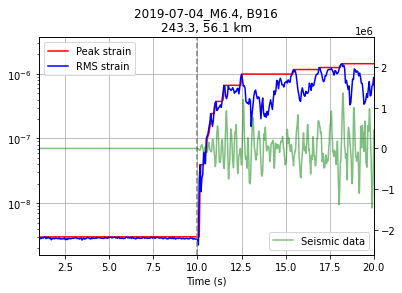

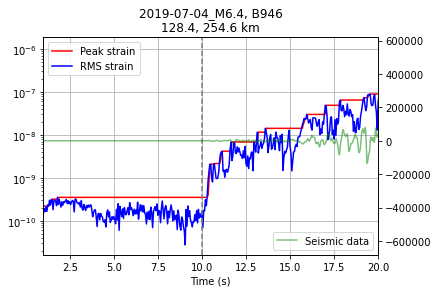

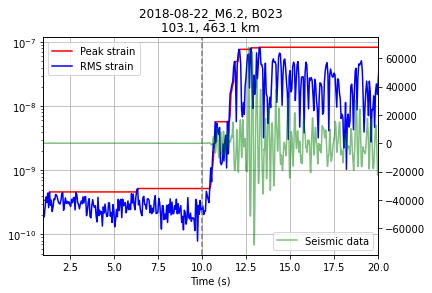

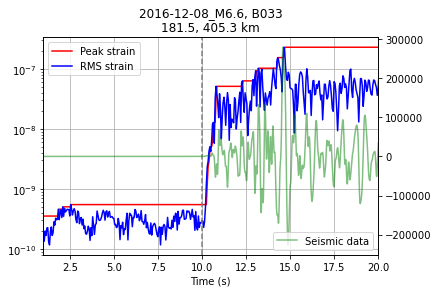

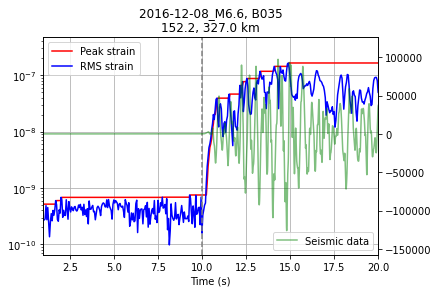

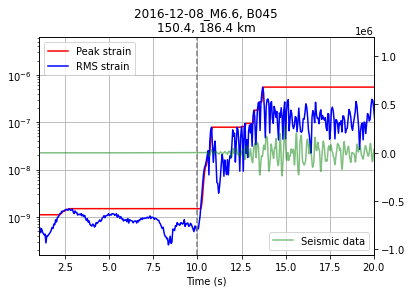

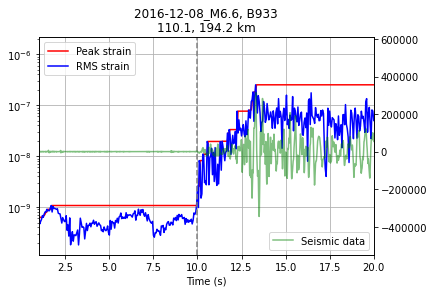

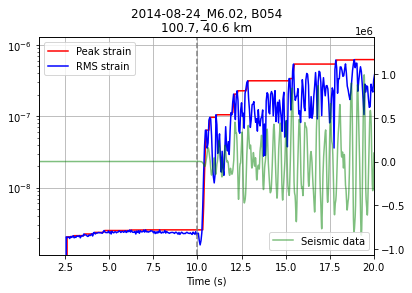

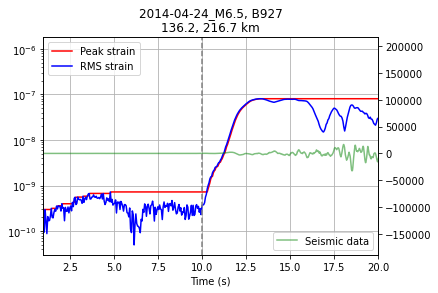

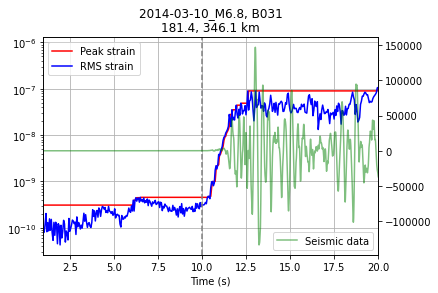

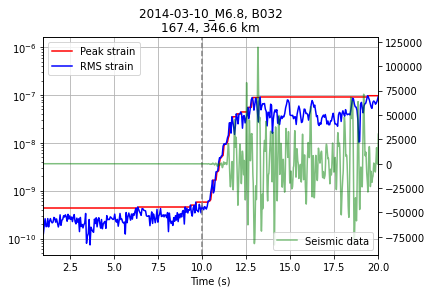

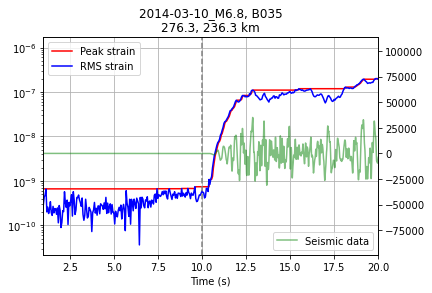

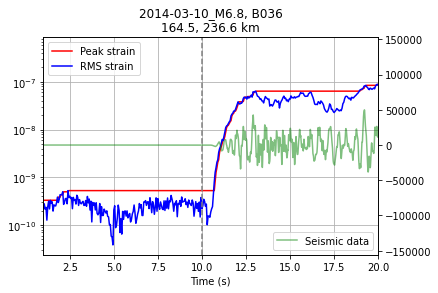

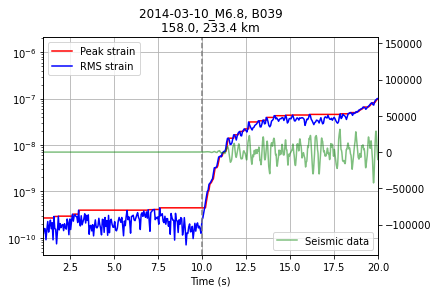

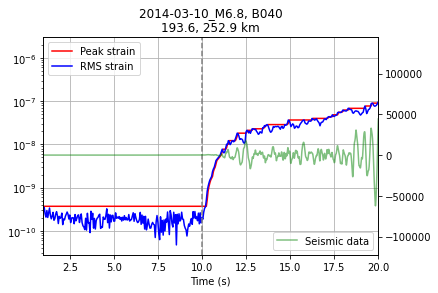

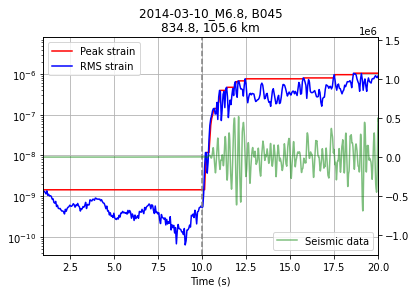

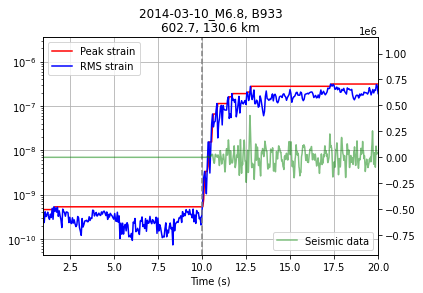

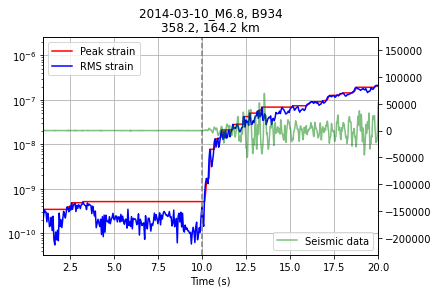

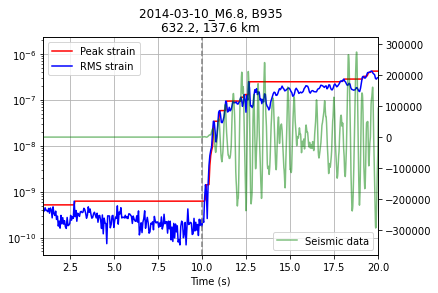

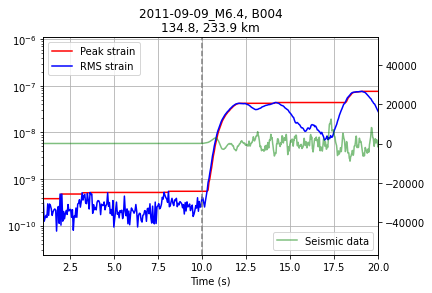

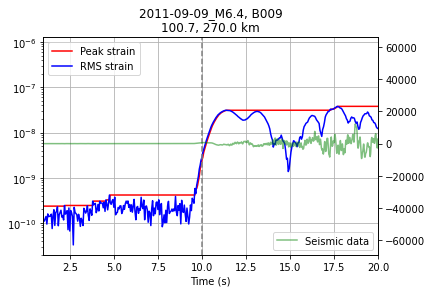

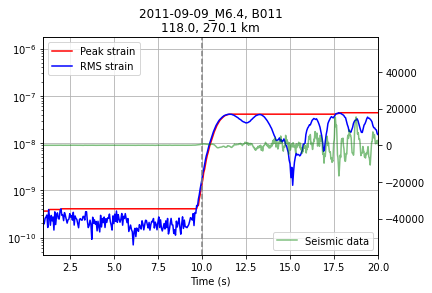

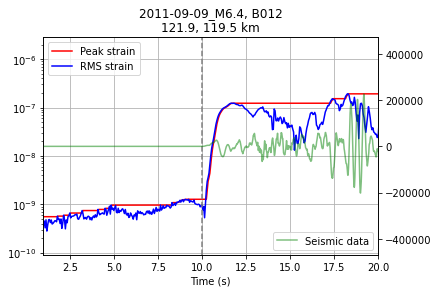

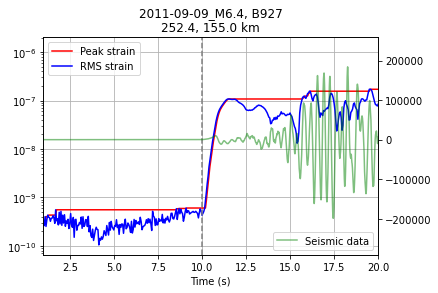

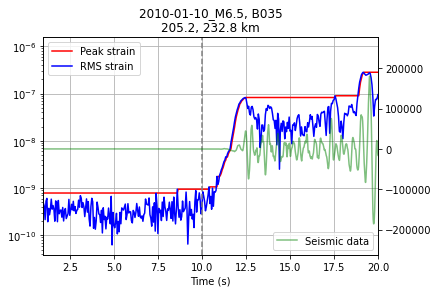

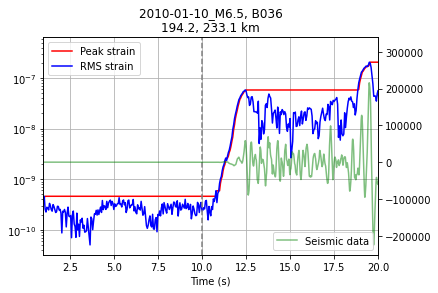

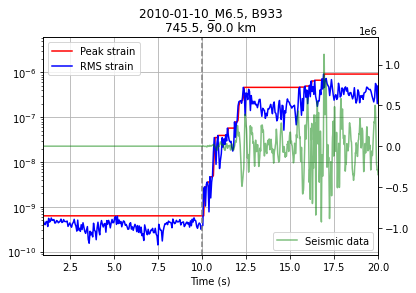

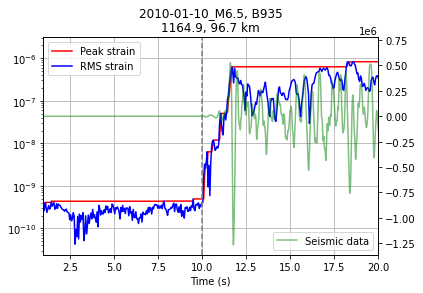

In [134]:
close_snrs = []

for i in range(len(snr_array)):
    
    eq_id = snr_array[i,0]
    sta = snr_array[i,5]
    hypdist = float(snr_array[i,8])
    
#     print(eq_id, sta)
    snr = snr_array[i,9]
#     print(snr)
    
    if snr != 'nan':
        strain_waves = read(path_to_files + 'strain_data/trimmed/' + str(eq_id) + '/' + str(sta) + '.mseed')
    else:
        continue
    
    times = strain_waves[0].times()
    data = strain_waves[0].data
    
    pst = read(path_to_files + 'strain_data/peak/' + str(eq_id) + '/' + str(sta) + '.mseed')   
    pst_times = pst[0].times()
    pst_data = pst[0].data
    
    seis = read(path_to_files + 'seismic_data/trimmed/' + str(eq_id) + '/' + str(sta) + '.mseed')
    seis_times = seis[0].times()
    seis_data = seis[0].data
    
    snr = round(float(snr),1)
    
#     if hypdist <= 100:
#         close_snrs.append(snr)
        
    if snr >= 100:
        fig = plt.figure(facecolor = 'white', num = 1, clear = True)
        ax = fig.add_subplot(111)
        ax.grid()
        ax.set_title(str(eq_id) + ', ' + str(sta) + '\n' + str(snr) + ', ' + str(round(hypdist,1)) + ' km')
        ax.plot(pst_times, pst_data, color = 'red', label = 'Peak strain')
        ax.plot(times, data, color = 'blue', label = 'RMS strain')
        ax2 = ax.twinx()
        ax2.plot(seis_times, seis_data, color = 'green', alpha = 0.5, label = 'Seismic data')
        ax.set_yscale('log')
    #     ax.set_ylabel('Log of peak extensional\nmicrostrain ($10^{-6}$)', fontsize = 15)
        ax.set_xlabel('Time (s)')
        ax.set_xlim(1,20)
    #     ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
        ax.axvline(x = 10, color = 'gray', linestyle = '--')
#             ax.tick_params(labelsize = 13)
        ax.legend(loc = 'upper left')
        ax2.legend(loc = 'lower right')
        plt.show()
            
            
            
#             plt.title(str(snr) + ', ' + str(round(hypdist,1)) + ' km')
#             plt.plot(times, data, color = 'blue')
#             plt.plot(pst_times, pst_data, color = 'red')
#             plt.plot(pst_times, pst_data, color = 'red')
#             plt.semilogy()
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,30)
#             plt.show()
            
#         elif 5 < snr <= 10:
#             plt.title(str(snr) + ', ' + str(round(hypdist,1)) + ' km')
#             plt.plot(times, data, color = 'blue')
#             plt.plot(pst_times, pst_data, color = 'red')
#             plt.semilogy()
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,30)
#             plt.show()
            
#         elif 10 < snr <= 20:
#             plt.plot(times, data, color = 'orange')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(str(snr) + ', ' + str(round(hypdist,1)) + ' km')
#             plt.show()
            
#         elif 20 < snr <= 30:
#             plt.plot(times, data, color = 'green')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
            
#         elif 30 < snr <= 40:
#             plt.plot(times, data, color = 'blue')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
        
#         elif 40 < snr <= 50:
#             plt.plot(times, data, color = 'purple')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
            
#         else:
#             plt.plot(times, data, color = 'black')
#             plt.axvline(x = 10, linestyle = '--', color = 'gray')
#             plt.xlim(0,60)
#             plt.title(snr)
#             plt.show()
            
# print(len(close_snrs))
# plt.hist(close_snrs, bins = 30);

17


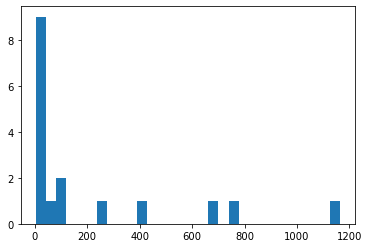

In [121]:
print(len(close_snrs))
plt.hist(close_snrs, bins = 30);

In [112]:
# Hypdist <100, SNR 5-10

pair1 = '2021-12-20_M6.2/B933'
pair2 = '2021-12-20_M6.2/B934'
pair3 = '2021-12-20_M6.2/B935'
pair4 = '2014-08-24_M6.02/B057'
pair5 = '2021-12-20_M6.2/B045' # Other close station, but not in above 4

seis1 = read(path_to_files + 'seismic_data/trimmed/' + pair5 + '.mseed')
times1 = seis1[0].times()
data1 = seis1[0].data

i = np.where(data1 != 0)[0]
print(i)
print(times1[i[0]])
print(str(9 - times1[i[0]]) + ' seconds of data')

strain2 = read(path_to_files + 'strain_data/trimmed/' + pair5 + '.mseed')
times2 = strain2[0].times()
data2 = strain2[0].data

p = np.where(data2 != 0)[0]
print(p)
print(times2[p[0]])
print(str(9 - times2[p[0]]) + ' seconds of data')


[  614   615   616 ..., 11998 11999 12000]
6.14
2.86 seconds of data
[ 123  124  125 ..., 2398 2399 2400]
6.15
2.85 seconds of data


In [83]:
i = np.where(data1 != 0)[0]
print(i)

[  558   559   560 ..., 11998 11999 12000]


In [102]:
k = np.where(snr_array[:,0] == '2019-07-06_M7.1')[0]
print(snr_array[:, [5, 8]][k])

[['B054' '471.406910982']
 ['B058' '375.470295787']
 ['B065' '364.593499541']
 ['B066' '378.320832875']
 ['B067' '373.085557872']
 ['B072' '248.267862681']
 ['B073' '260.180705894']
 ['B075' '263.998822937']
 ['B076' '255.910608165']
 ['B078' '248.297051697']
 ['B079' '235.829519152']
 ['B081' '242.299832696']
 ['B082' '257.821320121']
 ['B084' '261.290416738']
 ['B086' '264.204430946']
 ['B087' '268.30226018']
 ['B088' '280.402623988']
 ['B089' '257.639877904']
 ['B093' '253.222063341']
 ['B900' '217.657681388']
 ['B901' '230.2001258']
 ['B916' '47.348199003']
 ['B917' '52.2843616925']
 ['B921' '23.7989220516']
 ['B946' '264.264244142']]


2022-12-20_M6.4 B045 37.4899632336
6.35 seconds of data

2022-12-20_M6.4 B933 64.4685565368
2022-12-20_M6.4 B934 97.9353971924
9.0 seconds of data

2022-12-20_M6.4 B935 72.2166295398
9.0 seconds of data

2021-12-20_M6.2 B045 26.0916102225
2.85 seconds of data

2021-12-20_M6.2 B933 46.1320567955
3.4 seconds of data

2021-12-20_M6.2 B934 79.6555825499
3.2 seconds of data

2021-12-20_M6.2 B935 62.2800726464
2.95 seconds of data

2019-07-06_M7.1 B916 47.348199003
6.8 seconds of data

2019-07-06_M7.1 B917 52.2843616925
7.6 seconds of data

2019-07-06_M7.1 B921 23.7989220516
3.05 seconds of data

2019-07-04_M6.4 B916 56.0594638122
8.35 seconds of data

2019-07-04_M6.4 B917 41.5251576159
5.85 seconds of data

2019-07-04_M6.4 B921 13.7133865618
1.9 seconds of data

2014-08-24_M6.02 B054 40.6263371227
6.45 seconds of data

2014-08-24_M6.02 B057 30.4576274664
4.7 seconds of data

2010-01-10_M6.5 B933 89.9919461103
9.0 seconds of data

2010-01-10_M6.5 B935 96.7214658883
9.0 seconds of data



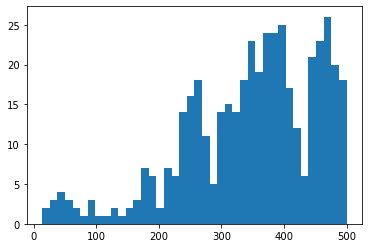

In [117]:
plt.hist(snr_array[:,8].astype(float), bins = 40);

j = np.where(snr_array[:,8].astype(float) <= 100)[0]
# print(snr_array[:, [0, 5, 8]][j])

less100km = snr_array[j]
for i in range(len(less100km)):
    
    eq_id = less100km[i,0]
    sta = less100km[i,5]
    hypdist = float(less100km[i,8])
    
    print(eq_id, sta, hypdist)
    snr = less100km[i,9]
#     print(snr)
    
    if snr != 'nan':
        strain_waves = read(path_to_files + 'strain_data/trimmed/' + str(eq_id) + '/' + str(sta) + '.mseed')
    else:
        continue
    
    times = strain_waves[0].times()
    data = strain_waves[0].data
    
    pst = read(path_to_files + 'strain_data/peak/' + str(eq_id) + '/' + str(sta) + '.mseed')   
    pst_times = pst[0].times()
    pst_data = pst[0].data
    
    seis = read(path_to_files + 'seismic_data/trimmed/' + str(eq_id) + '/' + str(sta) + '.mseed')
    seis_times = seis[0].times()
    seis_data = seis[0].data
    
    snr = round(float(snr),1)
    
    i = np.where(data != 0)[0]
#     print(i)
#     print(times1[i[0]])
    print(str(9 - times[i[0]]) + ' seconds of data')
    print('')
    
#     fig = plt.figure(facecolor = 'white', num = 1, clear = True)
#     ax = fig.add_subplot(111)
#     ax.grid()
#     ax.set_title(str(eq_id) + ', ' + str(sta) + '\n' + str(snr) + ', ' + str(round(hypdist,1)) + ' km')
#     ax.plot(pst_times, pst_data, color = 'red', label = 'Peak strain')
#     ax.plot(times, data, color = 'blue', label = 'RMS strain')
#     ax2 = ax.twinx()
#     ax2.plot(seis_times, seis_data, color = 'green', alpha = 0.5, label = 'Seismic data')
#     ax.set_yscale('log')
# #     ax.set_ylabel('Log of peak extensional\nmicrostrain ($10^{-6}$)', fontsize = 15)
#     ax.set_xlabel('Time (s)')
#     ax.set_xlim(1,20)
# #     ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
#     ax.axvline(x = 10, color = 'gray', linestyle = '--')
# #             ax.tick_params(labelsize = 13)
#     ax.legend(loc = 'upper left')
#     ax2.legend(loc = 'lower right')
#     plt.show()
